<h1> Import data </h1>

In [1]:
import pandas as pd
import numpy as np
datafile = "train_V2.csv"
df = pd.read_csv(datafile)

In [2]:
df.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace      ...       revives  \
0         0.00      0              0      0         60      ...             0   
1        91.47      0              0      0         57      ...             0   
2        68.00      0              0      0         47      ...             0   
3        32.90      0              0      0         75      ...             0   
4       100.00      0              0      0         45      ...             0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1        0.0045          0         11.04          0               0   
2        0.0000          0          0.00          0               0   
3        0.0000          0          0.00          0               0   
4        0.0000          0          0.00          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        244.80                1       1466        0.4444  
1       1434.00                5          0        0.6400  
2        161.80                2          0        0.7755  
3        202.70                3          0        0.1667  
4         49.75                2          0        0.1875  

[5 rows x 29 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4446966 entries, 7f96b2f878858a to 0d8e7ed728b6fd
Data columns (total 28 columns):
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(3)
memory usage: 983.9+ MB


<h1>Drop all the missing values</h1>
<li>In this file, there is no missing value

In [3]:
#drop all the missing values,  in this file, there is no missing value
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 1017.8+ MB


In [4]:
# rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
# Clean the data that rankPoints = -1, since it means none in this file
df = df[df['rankPoints'] !=-1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745155 entries, 1 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 628.3+ MB


In [5]:
# check how many data delete from rankPoint = -1
#14446965 original rows
# 2745155 : rows remained after clean the rankPoint = -1
deletdata = (4446965- 2745155)/4446965
deletdata
# not a big potion and still have a bigdata set, good to go

0.3826902168107912

<h1>Identify the cheater</h1> 
<li>Aim Hacks
<ol>
<li>They will take control of a players aim and automatically target it towards opponents. 
</ol>

<li>Speed Hacks
<ol>
<li>They usually give the player a massive speed increase, meaning they can go from one side of the map to the other in seconds. （Idea: First find out the total distance and game duration, to caculate the average speed --> if the speed is 3 times higher than the toal average speed, then identify the cheaters. --> Hard to check, since player may not run but swim or drive,can not get an effective velocity 
<li>Distance: not straight foward since the game duration is different）
</ol>

<li>Recoil Hacks
<ol>
<li>automatically manage the recoil. This means all they have to do is press the fire button and don’t have to adjust their mouse to account for the recoil, as the script will do it all for them and every shot will go exactly where they want it to.(all kills are headshotXXX) （远距离伤人）
</ol>

<li>Wall Hacks
<ol>
<li>Wall hacks basically allow cheaters to see other players through walls, or add extra UI elements to reveal a players location. (kill 100 people without moving)
</ol>
Abnormal Weapons Hackers：aquaring 100 weapons without moving

<h1>Aim Hacks</h1> 

They will take control of a players aim and automatically target it towards opponents. First look through the density of kills, then decided the outlier to identify the cheaters. 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns


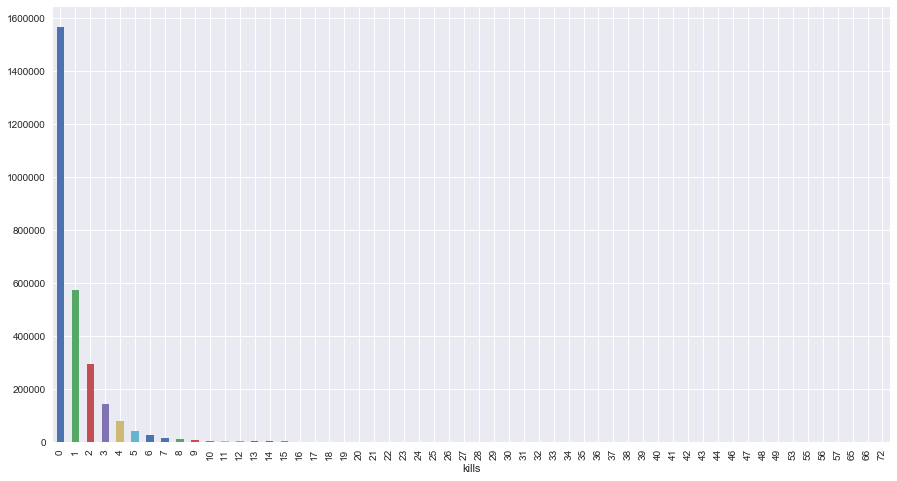

In [7]:
kills = df.groupby('kills')
Aim_Hacks = kills.size().plot(kind='bar', figsize=(15,8))
plt.savefig('Aim_Hacks.jpg')
# Aim_Hacks_Fig.savefig('aim_hacks.jpg')

In [8]:
max(df['kills'])
# most people have kills between 0 - 15, but the max number is 72 which is very far away from the general group. 
#So decided to identify players with 40 kills to be the cheater

72

In [9]:
df[df['kills'] > 40] #22 players have over 40 kills

Id         groupId         matchId  assists  boosts  \
156599   746aa7eabf7c86  5723e7d8250da3  f900de1ec39fa5       21       0   
334400   810f2379261545  7f3e493ee71534  f900de1ec39fa5       20       0   
672993   da31f191ace8ed  ce9a3c4950a8f2  17dea22cefe62a       10       0   
770454   2ade4369bccd12  9f9e64a3db8384  e024bf51bf1799       12       0   
1248348  80ac0bbf58bfaf  1e54ab4540a337  08e4c9e6c033e2        5       0   
1378200  f241fdbb4f94c6  fadbbc4cbb3e06  e024bf51bf1799        9       0   
1462706  be4ff9afaa5bb1  abb73dd57619fa  f900de1ec39fa5       22       0   
1491277  1f6ceaa5140fb6  dc2fef63e14d5c  f900de1ec39fa5       15       0   
1744705  22219eee457455  8e7fc0a8043552  e024bf51bf1799        9       0   
2020831  9b5bcc3a3dd42a  bdd2cf09863501  6bf647ecee30da        2       0   
2040545  3e28994fb2950b  1a0f16d65f7865  8d2c4d5a49420b        1       0   
2105633  770c02791306c4  48ca6706a90e10  6ee2c835176181        8       0   
2215801  a14d787063ba9a  e64b5285fd2987  e024bf51bf1799        9       0   
2575145  40a030aacbfc0b  33326ae07ca3e4  f900de1ec39fa5        6       0   
2601666  436d1530e9eb00  5c974c2bb9d9f0  fe7043ee6221c8        5       0   
2914453  d10322b281014b  a999807e7f7780  904cecf36217df        2      10   
2929506  97047ef60af1e7  f02fdd0b3071d3  5921b55b9e96b5       11       0   
3206834  84f646d02cba7a  7e3a62ea8f1832  6680c7c3d17d48        8       3   
3431247  06308c988bf0c2  4c4ee1e9eb8b5e  6680c7c3d17d48        7       4   
3702869  e0ea16ac6718e4  5bc75ce9e16956  e024bf51bf1799       13       0   
3730946  fb127150830c2d  62bc19a85c2ed8  17dea22cefe62a        5       0   
4273754  2a4c8d7cdb0361  8ee08f3d84dc3a  17dea22cefe62a        6       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace      ...       \
156599        5479.0      0             12      7          4      ...        
334400        6616.0      0             13      5          1      ...        
672993        5793.0      0              5      2          1      ...        
770454        5557.0      0              7      4          1      ...        
1248348       6375.0      0             21      4          1      ...        
1378200       3707.0      0              5      1          5      ...        
1462706       5377.0      0              8      4          3      ...        
1491277       5468.0      0             13      5          2      ...        
1744705       4376.0      0             11      5          4      ...        
2020831       4889.0      0             46      2          1      ...        
2040545       3695.0      0             39      2          1      ...        
2105633       4272.0     40             34      0          1      ...        
2215801       4263.0      0             11      4          2      ...        
2575145       3479.0      0              3      5          5      ...        
2601666       4347.0      0             31      0          1      ...        
2914453       4840.0      0             27      3          1      ...        
2929506       5520.0      0              8      4          1      ...        
3206834       3641.0      0             15      3          2      ...        
3431247       5990.0      0             64     10          1      ...        
3702869       4352.0      0              9      4          3      ...        
3730946       4313.0      0              5      5          3      ...        
4273754       5297.0      0              5     11          2      ...        

         revives  rideDistance  roadKills  swimDistance  teamKills  \
156599         0           0.0          0           0.0          0   
334400         0           0.0          0           0.0          0   
672993         0           0.0          0           0.0          0   
770454         0           0.0          0           0.0          0   
1248348        0           0.0          0           0.0          0   
1378200        0           0.0          0           0.0  

/Users/wen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


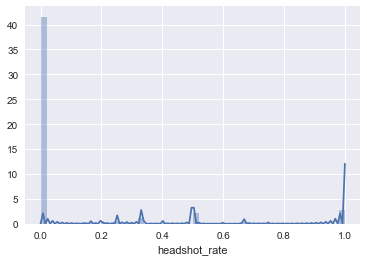

In [10]:
df['headshot_rate'] = df['headshotKills']/df['kills']
# headshot_rate = df.groupby('headshot_rate')
df['headshot_rate'] = df['headshot_rate'].fillna(0)
headshot_rate = sns.distplot(df['headshot_rate'] , bins=50)
plt.savefig('headshot_rate.jpg')

# the density function did not vary a lot between [0,1], so do not consider the high headshot rate as cheater

<h1>Speed Hacks</h1>

They usually give the player a massive speed increase, meaning they can go from one side of the map to the other in seconds. 

Idea: 
<li>First find out the total distance and game duration, to caculate the average speed --> if the speed is 3 times higher than the toal average speed, then identify the cheaters. --> Hard to check, since player may not run but swim or drive,can not get an effective velocity 
<li>Distance: not straight foward since the game duration is different

<h1>Recoil Hacks</h1> 
Automatically manage the recoil. This means all they have to do is press the fire button and don’t have to adjust their mouse to account for the recoil, as the script will do it all for them and every shot will go exactly where they want it to.
<li> Let's assume the 1km snip shot is a cheater based on the general data

/Users/wen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


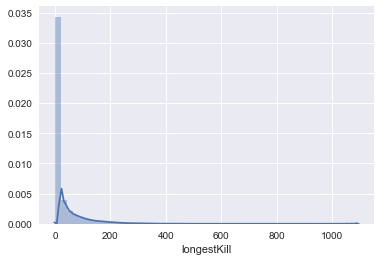

In [11]:
# longestkill = df.groupby('longestKill')
# longestkill.size().plot(kind='bar', figsize=(15,8))
longest_kill = sns.distplot(df['longestKill'] , bins=50)
plt.savefig('longest_kill.jpg')

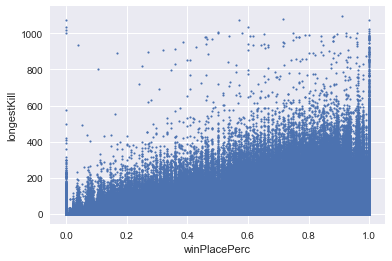

In [12]:
fig, ax = plt.subplots()
winplac_lonkill = df.plot.scatter(x="winPlacePerc",y="longestKill", s = 3,ax=ax)
plt.savefig("winplac_lonkill.jpg")
# Most people with high longestKill with have a high Percenge of the winning. It is true since the longest kills can show the skills, but also this will be a good factor to detect cheaters. 

In [17]:
df[df['longestKill'] >=1000]

groupId         matchId  assists  boosts  damageDealt  \
Id                                                                             
88e2af7d78af5a  34ddeede52c042  4346bc63bc67fa        0       3        783.9   
ef390c152bcc3d  30fd444be3bbc1  4f7f8d6cf558b4        2       0       1028.0   
1ff9763ca30279  7fb3a83ebb050d  838cb9a3c94598        0       0        151.2   
4e7e6c74e3c57d  94698690918933  da91b0c3d875f8        0       0        196.8   
1f5ba6e0cfb968  512ea24b831be3  5fb0d8b1fc16cf        4       0       1012.0   
f4082eee4c45e9  4d02ce950f74fc  838cb9a3c94598        1       0        916.4   
91966848e08e2f  0ee4fbd27657c9  17dea22cefe62a        3       2       2103.0   
5ff0c1a9fab2ba  2d8119b1544f87  904cecf36217df        3       3       1302.0   
42df3102cb540b  7d9b2be15b355b  610d78f3affd2e        5       0       2500.0   
4b9f61bac5eb0a  bc717b964f3bbe  838cb9a3c94598        3       0        945.4   
7f77051c7cef52  d6579a630399b5  4784f7d9a06b51        3       5       1025.0   
5524c154448425  674195558ad41b  db6f6d1f0d4904        1       0       1355.0   
d0c286ce498e17  17fdd45e612bab  3eaaa2f7a360fe        7       0       2330.0   
db638834c62f6f  0614b611d6a935  ff80300f8262f5        2       0        517.0   
ba51dd0a1611c0  0614b611d6a935  ff80300f8262f5        2       0        460.2   

                DBNOs  headshotKills  heals  killPlace  killPoints  \
Id                                                                   
88e2af7d78af5a      5              1      1          5           0   
ef390c152bcc3d      0              0      0          9           0   
1ff9763ca30279      0              0      0         45           0   
4e7e6c74e3c57d      0              0      0         51           0   
1f5ba6e0cfb968     11              5      0          5           0   
f4082eee4c45e9      0              0      0         17           0   
91966848e08e2f      0              4     11         11           0   
5ff0c1a9fab2ba      0              6      5         15           0   
42df3102cb540b      0              7      1          2           0   
4b9f61bac5eb0a      0              0      0         11           0   
7f77051c7cef52      5              2      5          2           0   
5524c154448425      0              2      0          9           0   
d0c286ce498e17      0              2      0          2           0   
db638834c62f6f      0              0      0         10           0   
ba51dd0a1611c0      0              1      0          3           0   

                    ...        rideDistance  roadKills  swimDistance  \
Id                  ...                                                
88e2af7d78af5a      ...              723.20          0          0.00   
ef390c152bcc3d      ...             1717.00          0          0.00   
1ff9763ca30279      ...                0.00          0          0.00   
4e7e6c74e3c57d      ...             2085.00          0          0.00   
1f5ba6e0cfb968      ...                0.00          0          0.00   
f4082eee4c45e9      ...                0.00          0          0.00   
91966848e08e2f      ...                0.00          0          0.00   
5ff0c1a9fab2ba      ...                0.00          0          0.00   
42df3102cb540b      ...                0.00          0          0.00   
4b9f61bac5eb0a      ...                0.00          0          0.00   
7f77051c7cef52      ...                0.00          0         87.96   
5524c154448425      ...                0.00          0          0.00   
d0c286ce498e17      ...                0.00          0          0.00   
db638834c62f6f      ...               34.88          0          0.00   
ba51dd0a1611c0      ...                0.00          0          0.00   

                teamKills vehicleDestroys  walkDistance  weaponsAcquired  \
Id                                                                         
88e2af7d78af5a          0               1       3052.00                9   
ef390c152bcc3d    

<h1>Wall Hacks</h1>
Wall hacks basically allow cheaters to see other players through walls, or add extra UI elements to reveal a players location. 
<li> High Headshot rate without moving long

In [13]:
# Get the Total Distance the player has moved in one game
df['Total Distance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
# sns.distplot(df['Total Distance'] , bins=50)


/Users/wen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


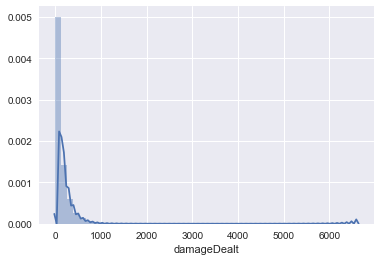

In [14]:
# Look through the General numbers of the damageDealt
damagedealt = sns.distplot(df['damageDealt'] , bins=50)
plt.savefig('damagedealt.jpg')
# df['damageDealt'].describe()

In [15]:
# The 10% least moving distance -- 0.1 percentile of moving distance
move_low_bound = df['Total Distance'].quantile(0.1)
move_low_bound

42.4

In [16]:
# The 10% most damage Dealt amount -- 0.9 percentile of weapons acquired
damage_upp_bound = df['damageDealt'].quantile(0.9)
damage_upp_bound

331.6

In [17]:
df[(df['damageDealt'] >= damage_upp_bound) & (df['Total Distance'] <= move_low_bound)]
# from the data, we can see that there 1291 player who almost did not move at all but get the almost highest damages, it is reasonable to assume they are the cheaters

Id         groupId         matchId  assists  boosts  \
1357     72f70c6c074ca9  da042db555b932  f3c5fa51aacb95        0       0   
1824     b538d514ef2476  0eb2ce2f43f9d6  35e7d750e442e2        0       0   
6673     6d3a61da07b7cb  2d8119b1544f87  904cecf36217df        2       0   
11892    550398a8f33db7  c3fd0e2abab0af  db6f6d1f0d4904        2       0   
20881    40871bf43ddac7  2cea046b7d1dce  0600f86f11c6e4        0       0   
21842    ddd3f3db2e40af  7d9811ed89d03a  2ab8ef7955d1d9        1       0   
23115    74796cbac60cb0  a17261ab261e78  7a243846f0271a        0       3   
23298    b950836d0427da  1f735b1e00d549  ad860f4e162bbc        1       0   
24110    7d5c3aabe63572  a00b3073d12086  237585cba79025        0       0   
24640    aeced11d46de19  d4009ffa95bb4f  73f3ed869c9171        2       0   
30117    354c12fdf318cc  e8a0a7e3408def  3d99e6dc84792b        0       0   
32930    221ee0d8ab7501  ddfc5da4df6dce  fa373e28ff5062        2       0   
35303    b39be5f06554a0  17af8e64d82c74  e60b0ee21998ff        2       0   
38348    a0dafc8b8cba11  952b4d4254f556  904cecf36217df        2       0   
40756    2d98a6b05e0977  2452cb67096aaf  0c565888b3c1c6        0       0   
42034    390191b470505b  a0d33c1f1c4278  03da8c737b3fe2        0       0   
46689    f28a495f53e4d6  f3b1243cd98d97  950f825e5b8c21        0       0   
47241    d66b1f32585f7a  ec57b7fc28644f  ea5ba780c3861d        0       0   
50007    548c8aee07a9b9  039233e3876bf1  f1a720444a7923        0       0   
50509    bfa1ef10f4eed5  32e19303676835  5767d58998bc75        0       0   
59565    6cc34d6af024d4  33646e41ee63a6  35e7d750e442e2        3       0   
62441    03e31e144e3671  ffcaf8cd0e5d7d  001cd8e7e6b737        0       0   
63390    94c9cb10e43daa  70989d9beecc96  20ac97e69f1268        0       0   
66457    d95d4b45c04b2e  2c321d0b274127  3c793aea9bf008        1       0   
68005    d8353c20cef5a7  5c63c3cc43b6b8  d751b4e3fde5bd        3       0   
70617    a11ab81c7e5f82  36adc59a04b520  d481bc1556f9a2        0       0   
71469    f09c2ecc99b763  49fe5e626935ba  0101ab001bb2c2        0       0   
72092    8bd2172a5fb9c5  6c0b87f21bdede  ad860f4e162bbc        2       0   
85102    aea550fbabf3ed  f8150bb40a6821  fe6875c748e67d        0       0   
86714    35ed4abf74bdfe  e27c4b8943eed8  162e0a11b967bb        0       0   
...                 ...             ...             ...      ...     ...   
4324501  f9e4284c748c81  20a45a96b5d95e  001cd8e7e6b737        3       0   
4324754  7a9fe5c4f4bc6d  2fb909218de0b1  fda32450218c77        0       0   
4328268  47d25e17f78574  5d9cf2203f7212  3d17ad8fd30929        0       0   
4332255  9baf93bf20ca23  bba30ed198cd8e  f014d3a97e700d        0       0   
4337121  65913e215ddaf9  9d010232fd5264  2c7ee565a600c6        0       0   
4346623  fc9b653b777ff0  eb0899940e03e3  70f54c8eb2404b        2       0   
4352667  800fb29427e0f0  d4e51769f062b6  ea31f72fb8b639        0       0   
4355295  e982d1cdf4c2d5  5a6ed4dd7fb18b  8430bd008e0da8        0       0   
4355426  5c99ac431a610f  a81a17e769f97b  89658ff71373e0        0       0   
4363437  9939bbded98ef0  eba38f4f2d7041  ac851f0174ba84        2       0   
4370123  e4d250142a9759  77a033ebd79859  3968ebcef3bf3a        0       0   
4376342  a4daf0526eaf15  5177168c7eeea3  2632a6006dc6bf        0       0   
4380825  0d13b66095371f  c98239253d4f3f  baf6cf44ed2aec        0       0   
4383292  8a81daa7957db4  f057c3b31d8fa7  324b25b287b94f        0       0   
4385883  200b66a8b935f5  259e60e9f2bbb9  aa48812b7f6eb7        0       0   
4391039  22136fb3fa9167  a13bb0cca929ea  10b90df0620d73        2       0   
4395723  e822c806d53de4  eda174acfb503b  4c6b1a0e4cb346        3       0   
4396145  b386927c238a07  f6983ff879b571  ac851f0174ba84        2       0   
4401502  2fb5375595838a  8c5115be85a2a7  7ae14295044ffe        0       2   
4402178  cf9d59ce1baa52  ad925e94828b47  7da4ac04a13e13        0       0   
4410937  aaff982af01221  33825a2248aa91  0287a3001f1447        2     

<h1>Abnormal weapon acquisition

In this part, we try to figure out cheaters considering weapons acquired and distance covered at the same time. First we plot the bar graph in which each cluster of bars represents total number of players fall into certain interval of percentiles of moving distance. And in every cluster of bars, there are also group of numbers of players grouped by weapons acquired. Second, we try to delete the data in which, the players move less than 90% of all players but acquire more weapons than 90% of all players.

In [18]:
# df['Total Distance'] = df['rideDistance'] + df['swimDistance'] + df['walkDistance']
# The 10% least moving distance -- 0.1 percentile of moving distance
move_low_bound = df['Total Distance'].quantile(0.1)
# The 10% most weapons acquiring amount -- 0.9 percentile of weapons acquired
weapon_upp_bound = df['weaponsAcquired'].quantile(0.9)
weapon_upp_bound

7.0

In [19]:
# Computing the percentiles of column weaponAcquired
level = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
percentile_weapon = list(map((lambda y: df["weaponsAcquired"].quantile(y)), level))
percentile_weapon


[1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 5.0, 5.0, 7.0, 153.0]

In [20]:
# computing the percentiles of column Total Distance
percentile_moving = list(map((lambda y: df["Total Distance"].quantile(y)), level))
percentile_moving

[42.4, 113.7, 219.9, 404.3, 807.7, 1569.8, 2384.0, 3248.8, 4959.0, 41270.1]

In [21]:
# define a function to group the dataframe by weaponAcquired percentile(from 10% to 100%)

def group_weapon(num):
#     l = percentile_weapon
    percentile =[1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 5.0, 5.0, 7.0, 153.0] # equal to the list as output above
    if num in percentile:
        i = percentile.index(num)
        return "<={:.2f}%".format(level[i] * 100)
    
    else:
        percentile = percentile
        percentile.append(num)
        percentile.sort()
        i = percentile.index(num)
        return "<={:.2f}%".format(level[i] * 100)

In [22]:
# define a function to group the dataframe by distance percentile(from 10% to 100%)
def group_moving(num):
    percentile = [42.4, 113.7, 219.9, 404.3, 807.7, 1569.8, 2384.0, 3248.8, 4959.0, 41270.1]
    if num in percentile:
        i = percentile.index(num)
        return "<={:.2f}%".format(level[i] * 100)
    else:
        percentile = percentile
        percentile.append(num)
        percentile.sort()
        i = percentile.index(num)
        return "<={:.2f}%".format(level[i] * 100)

In [23]:
df['moving_group'] = df['Total Distance'].apply(group_moving)
df['weapon_group'] = df['weaponsAcquired'].apply(group_weapon)

In [24]:
level_mark = ["<={:.2f}%".format(x * 100) for x in level]

In [25]:
dict_ = dict()
for i in level_mark:  # distance column
    value = list()
    key = "mov_" + i
    for j in level_mark: # weapons column
        count = sum(df[df["moving_group"]==i]['weapon_group']==j)
        value.append(count)
    dict_[key] = value
dict_

{'mov_<=10.00%': [227673, 35437, 0, 5935, 0, 1683, 820, 0, 976, 2019],
 'mov_<=20.00%': [133381, 95236, 0, 32667, 0, 9043, 2766, 0, 1011, 502],
 'mov_<=30.00%': [68076, 103036, 0, 62775, 0, 25549, 9609, 0, 4482, 1072],
 'mov_<=40.00%': [34656, 82632, 0, 76867, 0, 43932, 20816, 0, 12489, 2924],
 'mov_<=50.00%': [17184, 57284, 0, 74319, 0, 57577, 34719, 0, 25977, 7496],
 'mov_<=60.00%': [7257, 33707, 0, 61643, 0, 62920, 47103, 0, 45095, 16756],
 'mov_<=70.00%': [3303, 21814, 0, 50554, 0, 62502, 53727, 0, 58235, 24436],
 'mov_<=80.00%': [2016, 16310, 0, 43322, 0, 59903, 56027, 0, 66737, 30142],
 'mov_<=90.00%': [1996, 12753, 0, 35526, 0, 54281, 55647, 0, 74313, 40077],
 'mov_<=100.00%': [1688, 9202, 0, 28654, 0, 48441, 55561, 0, 82974, 47913]}

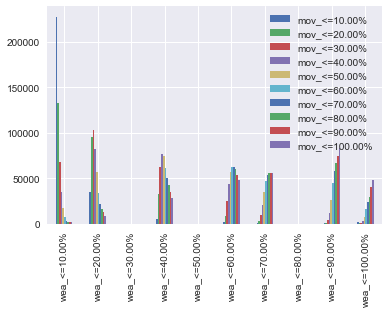

In [34]:
index = ["wea_"+x for x in level_mark]
grouping_df = pd.DataFrame(dict_,index=index,columns=dict_.keys())
weapon = grouping_df.plot(kind='bar')
plt.savefig('weapon.jpg')

In [156]:
# The number of players who move less than 90% of all but acquire more weapons than 90% of all is 2370. It is reasonbale to assume they are the cheaters. 
df[(df['weaponsAcquired'] >= weapon_upp_bound) & (df['Total Distance'] <= move_low_bound)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 1357 to 4446318
Data columns (total 32 columns):
Id                 2370 non-null object
groupId            2370 non-null object
matchId            2370 non-null object
assists            2370 non-null int64
boosts             2370 non-null int64
damageDealt        2370 non-null float64
DBNOs              2370 non-null int64
headshotKills      2370 non-null int64
heals              2370 non-null int64
killPlace          2370 non-null int64
killPoints         2370 non-null int64
kills              2370 non-null int64
killStreaks        2370 non-null int64
longestKill        2370 non-null float64
matchDuration      2370 non-null int64
matchType          2370 non-null object
maxPlace           2370 non-null int64
numGroups          2370 non-null int64
rankPoints         2370 non-null int64
revives            2370 non-null int64
rideDistance       2370 non-null float64
roadKills          2370 non-null int64
swimDistance       

### Eliminate cheaters from all the aspects analyzed

In [26]:
df = df[df['kills']<=40] 
df = df[df['longestKill'] <= 1000] 
df = df.drop(df[(df['damageDealt'] >= damage_upp_bound) & (df['Total Distance'] <= move_low_bound)].index)
df = df.drop(df[(df['weaponsAcquired'] >= weapon_upp_bound) & (df['Total Distance'] <= move_low_bound)].index)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4443270 entries, 0 to 4446965
Data columns (total 32 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
Total Distance     float64
moving_group       object
weapon_group       object
dtypes: float64(7), int64(19), object(6)
memory usage: 1.1+ GB


In [46]:
df.to_csv('CleanedData.csv')

<h1>Complementary

Where is the most popular area for bomb falling. [The Red Zone]

In [35]:
datafile = "kill_match_stats_final_4.csv"
df2 = pd.read_csv(datafile)
#import

In [238]:
# df3 = df2[:1000000]

In [241]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11640855 entries, 0 to 11640854
Data columns (total 12 columns):
killed_by            object
killer_name          object
killer_placement     float64
killer_position_x    float64
killer_position_y    float64
map                  object
match_id             object
time                 int64
victim_name          object
victim_placement     float64
victim_position_x    float64
victim_position_y    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.0+ GB


In [36]:
df2['killed_by'].unique()
#find out the index for killing by the falling bombs, which should be RedZone

array(['M249', 'Kar98k', 'Down and Out', 'SCAR-L', 'Bluezone', 'S686',
       'Grenade', 'Falling', 'P92', 'M416', 'SKS', 'AKM', 'UMP9', 'M16A4',
       'Tommy Gun', 'Mini 14', 'death.WeapSawnoff_C', 'S1897', 'S12K',
       'P1911', 'Drown', 'Mk14', 'Punch', 'Motorbike (SideCar)', 'VSS',
       'Vector', 'Uaz', 'Hit by Car', 'Boat',
       'death.ProjMolotov_DamageField_C', 'Groza', 'Micro UZI', 'R1895',
       'M24', 'Motorbike', 'Machete', 'Crossbow', 'Dacia', 'R45', 'Win94',
       'Sickle', 'DP-28', 'Buggy', 'Crowbar', 'Pan', 'P18C', 'AWM',
       'RedZone', 'death.Buff_FireDOT_C', 'Pickup Truck', 'AUG',
       'Aquarail', 'death.RedZoneBomb_C', 'Van', 'death.ProjMolotov_C',
       'death.PG117_A_01_C'], dtype=object)

In [243]:
df2.head()

killed_by    killer_name  killer_placement  killer_position_x  \
0          M249  0932313woaini               7.0           529007.7   
1        Kar98k     arunrunrun               6.0           440414.8   
2  Down and Out      Rabbit812               6.0           439923.2   
3  Down and Out  0932313woaini               7.0           530312.4   
4        SCAR-L      sa11y1126               3.0           466609.2   

   killer_position_y      map  \
0           440035.5  MIRAMAR   
1           285918.1  MIRAMAR   
2           282419.0  MIRAMAR   
3           440969.0  MIRAMAR   
4           409546.3  MIRAMAR   

                                            match_id  time  victim_name  \
0  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...  1209     GODusopp   
1  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...  1096  TheOnly_0ne   
2  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...  1096       NOAIM1   
3  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...  1209   liweiliwei   
4  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...  1793       PKBskg   

   victim_placement  victim_position_x  victim_position_y  
0              11.0           526111.8           432951.8  
1              13.0           438853.4           280981.6  
2              13.0           437034.8           282477.7  
3              11.0           528304.4           439696.8  
4               5.0           462901.5           403350.5

In [277]:
# df2[df2['killed_by'] =='RedZone']

In [37]:
miramar = df2[df2[ "map"] == "MIRAMAR"]
#analyze miramar map
miramar

killed_by       killer_name  killer_placement  killer_position_x  \
0                 M249     0932313woaini               7.0           529007.7   
1               Kar98k        arunrunrun               6.0           440414.8   
2         Down and Out         Rabbit812               6.0           439923.2   
3         Down and Out     0932313woaini               7.0           530312.4   
4               SCAR-L         sa11y1126               3.0           466609.2   
5             Bluezone               NaN               NaN                NaN   
6         Down and Out      AT_maozaomao               7.0           529282.9   
7                 S686        ruokuisama               2.0           434772.1   
8              Grenade           LinGend               1.0           325518.5   
9              Falling               NaN               NaN                NaN   
10                 P92         ShootmeXx              11.0           479229.9   
11        Down and Out    yuxiang7155784              10.0           506965.4   
12              SCAR-L           KOYO810               1.0           473172.9   
13        Down and Out  iphoneseven_user               1.0           325633.1   
14                M416        arunrunrun               6.0           440478.4   
15                S686          july5948              25.0           325721.7   
16                 SKS             Rveiw               8.0           388235.5   
17        Down and Out          ng_china               9.0           517572.5   
18        Down and Out            96Mini               3.0           625181.1   
19        Down and Out        ruokuisama               2.0           514616.2   
20            Bluezone               NaN               NaN                NaN   
21        Down and Out            wanlrj               9.0           517759.3   
22        Down and Out               NaN               NaN                NaN   
23                M416           1654765              17.0           456654.8   
24                M416           LinGend               1.0           325851.7   
25                 AKM         sa11y1126               3.0           626678.6   
26                S686        ruokuisama               2.0           434497.8   
27                UMP9     0932313woaini               7.0           637796.2   
28                UMP9     0932313woaini               7.0           630619.8   
29        Down and Out       linminzhong              24.0           376067.1   
...                ...               ...               ...                ...   
11639902     Micro UZI         Curleyfri              23.0           366235.3   
11639903      Bluezone               NaN               NaN                NaN   
11639904        SCAR-L         Yannyowns               5.0           285118.0   
11639905     Micro UZI          luthazar              12.0           365598.5   
11639906           SKS            sas776              24.0           420064.5   
11639907  Down and Out       EdgeLord745               5.0           286106.8   
11639908     Micro UZI             Phaqs              25.0           375570.5   
11639909     Motorbike           Luyucai               1.0           355261.8   
11639910  Down and Out         wufei1995               1.0           633478.8   
11639911      Bluezone               NaN               NaN                NaN   
11639912          UMP9          jjarredd              24.0           361185.0   
11639913          S12K  LaoZiJiaoYangGuo              16.0           371199.6   
11639914  Down and Out          Adolph00              17.0           371455.2   
11639915       Mini 14           Luyucai               1.0           398706.2   
11639916          M416         AClaudius              22.0           367543.2   
11639917         Win94      China-Liping              24.0           476651.2   
11639918       Mini 14           Luyucai               1.0           398923.9   
11639919          UMP9           Luyucai    

In [38]:
position_data = [ "victim_position_x", "victim_position_y"]

In [39]:
# change the x,y to match the number on the photo
for position in position_data:

    miramar[position] = miramar[position].apply( lambda x: x* 1000/ 800000)

    miramar = miramar[miramar[position] != 0]

/Users/wen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [282]:
miramar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967963 entries, 0 to 11639931
Data columns (total 12 columns):
killed_by            object
killer_name          object
killer_placement     float64
killer_position_x    float64
killer_position_y    float64
map                  object
match_id             object
time                 int64
victim_name          object
victim_placement     float64
victim_position_x    float64
victim_position_y    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 195.2+ MB


In [40]:
mira_sample = miramar[miramar[ "killed_by"] == 'RedZone']
# df2[df2['killed_by'] =='RedZone']
mira_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135 entries, 7578 to 11639639
Data columns (total 12 columns):
killed_by            2135 non-null object
killer_name          98 non-null object
killer_placement     98 non-null float64
killer_position_x    98 non-null float64
killer_position_y    98 non-null float64
map                  2135 non-null object
match_id             2135 non-null object
time                 2135 non-null int64
victim_name          2135 non-null object
victim_placement     2124 non-null float64
victim_position_x    2135 non-null float64
victim_position_y    2135 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 216.8+ KB


<h1> Complementary Code Summary

In [257]:
# import matplotlib.pyplot as plt # to show the map jpg
# import matplotlib.image as mpimg # mpimg read jpg
# mira_sample

In [41]:
import matplotlib.pyplot as plt # to show the map jpg
import matplotlib.image as mpimg # to read jpg
import matplotlib.cm as cm


/Users/wen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


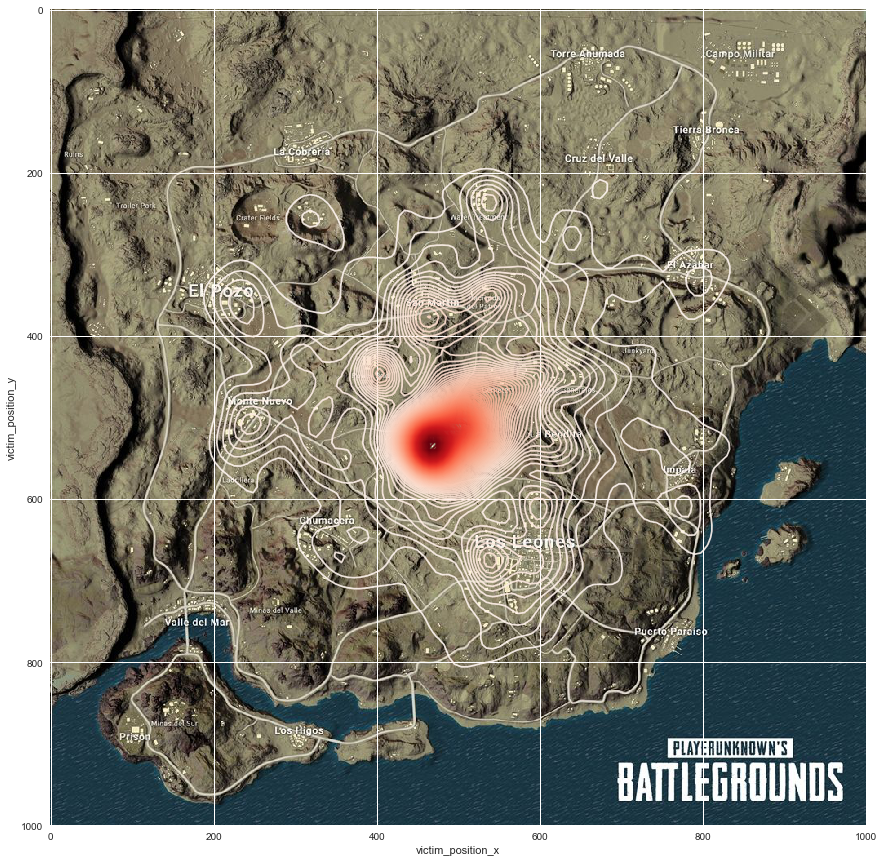

In [45]:
import matplotlib
miramar = df2[df2[ "map"] == "MIRAMAR"]

#convert the position to the ratio of the jpg

position_data = [ "victim_position_x", "victim_position_y"]

for position in position_data:

    miramar[position] = miramar[position].apply( lambda x: x* 1000/ 800000)

    miramar = miramar[miramar[position] != 0]



mira_sample = miramar[miramar[ "killed_by"] == 'RedZone']





bg = matplotlib.image.imread( "miramar.jpg")

fig, ax = plt.subplots( 1, 1,figsize=( 15, 15))

ax.imshow(bg)

sns.kdeplot(mira_sample[ "victim_position_x"], mira_sample[ "victim_position_y"],n_levels= 100, cmap=cm.Reds, alpha= 0.9)



In [46]:
fig.savefig('bomb_falling.jpg')

In [47]:
df2['map'].unique()

array(['MIRAMAR', 'ERANGEL', nan], dtype=object)

/Users/wen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


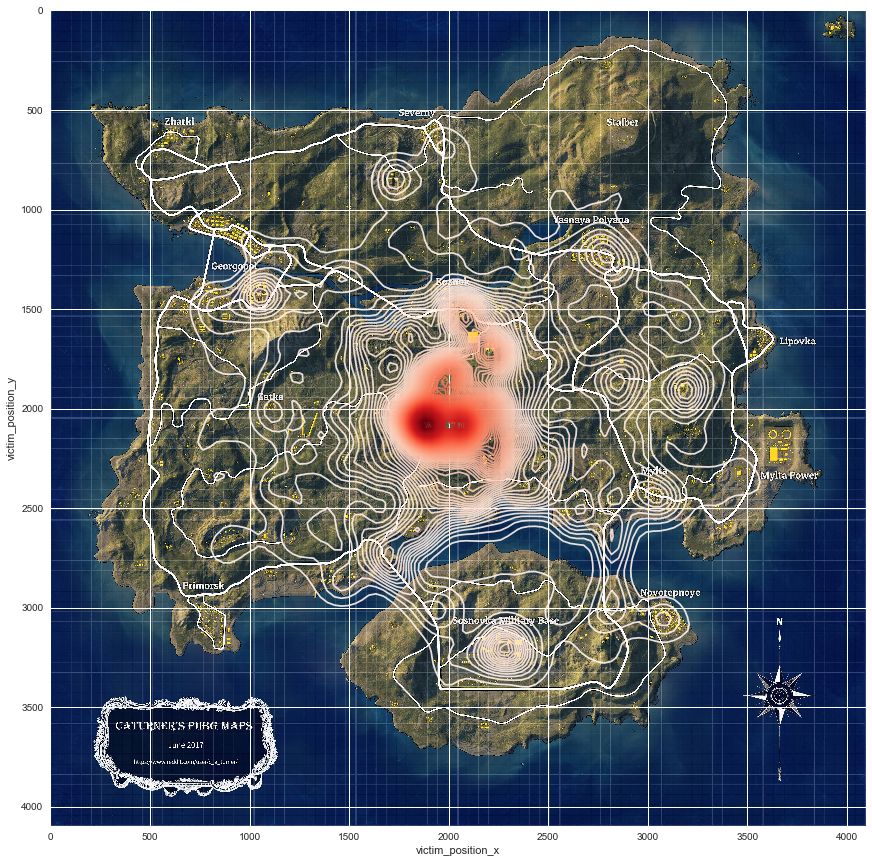

In [49]:
erangel = df2[df2[ "map"] == "ERANGEL"]


position_data = [ "victim_position_x", "victim_position_y"]

for position in position_data:

    erangel[position] = erangel[position].apply( lambda x: x* 4096/ 800000)

    erangel = erangel[erangel[position] != 0]
    

eran_sample = erangel[erangel[ "killed_by"] == 'RedZone']



# erangel heatmap

bg = matplotlib.image.imread( "erangel.jpg")

fig, ax = plt.subplots( 1, 1,figsize=( 15, 15))

ax.imshow(bg)

sns.kdeplot(eran_sample[ "victim_position_x"], eran_sample[ "victim_position_y"],n_levels= 100, cmap=cm.Reds, alpha= 0.9)
fig.savefig('bomb2.jpg')

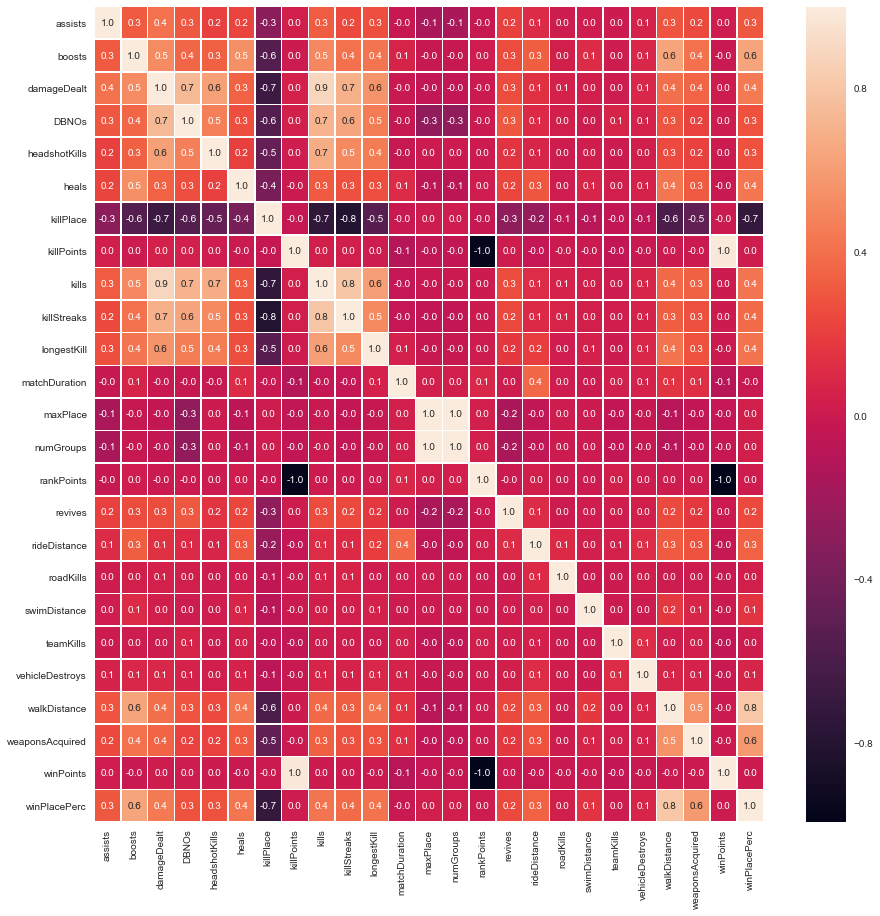

In [3]:

f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [4]:
f.savefig('heatmap.jpg')

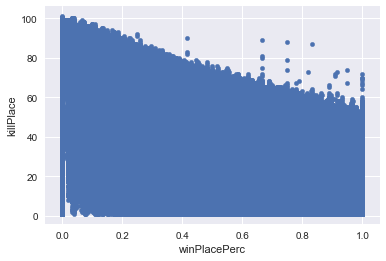

In [11]:
fig, ax = plt.subplots()
win_kill = df.plot(kind = 'scatter', x='winPlacePerc',y='killPlace', ax=ax)

In [12]:
fig.savefig('win_kill.jpg')

# Feature Engineering

In [35]:
train = df

In [28]:
invalid_match_ids = df[df['winPlacePerc'].isna()]['matchId'].values
train_cleaned = df[-df['matchId'].isin(invalid_match_ids)] # cleaned data

## Normalize

In [29]:
train_cleaned['playersJoined'] = train_cleaned.groupby('matchId')['matchId'].transform('count')
train_cleaned['killsN'] = train_cleaned['kills']*((100-train_cleaned['playersJoined'])/100 + 1)
train_cleaned['damageDealtN'] = train_cleaned['damageDealt']*((100-train_cleaned['playersJoined'])/100 + 1)

In [30]:
train_cleaned['maxPlaceN'] = train_cleaned['maxPlace']*((100-train_cleaned['playersJoined'])/100 + 1)
train_cleaned['matchDurationN'] = train_cleaned['matchDuration']*((100-train_cleaned['playersJoined'])/100 + 1)

## 1. Headshotrate

In [31]:
train_cleaned['headshotrate'] = train_cleaned['headshotKills'] / train_cleaned['kills']
train_cleaned['headshotrate'].fillna(0, inplace=True)
train_cleaned['headshotrate'].replace(np.inf, 0, inplace=True)

In [32]:
train_cleaned[['kills','headshotrate','headshotKills', 'winPlacePerc']].corr()

kills  headshotrate  headshotKills  winPlacePerc
kills          1.000000      0.326604       0.671076      0.426135
headshotrate   0.326604      1.000000       0.741548      0.183330
headshotKills  0.671076      0.741548       1.000000      0.282561
winPlacePerc   0.426135      0.183330       0.282561      1.000000

## 2. killStreak rate¶

In [33]:
train_cleaned['killStreakrate'] = train_cleaned['killStreaks'] / train_cleaned['kills']
train_cleaned['killStreakrate'].fillna(0, inplace=True)
train_cleaned['killStreakrate'].replace(np.inf, 0, inplace=True)
train_cleaned[['kills','killStreakrate','killStreaks', 'winPlacePerc']].corr()

kills  killStreakrate  killStreaks  winPlacePerc
kills           1.000000        0.372298     0.805046      0.426135
killStreakrate  0.372298        1.000000     0.756952      0.237672
killStreaks     0.805046        0.756952     1.000000      0.381035
winPlacePerc    0.426135        0.237672     0.381035      1.000000

## 3. healthitems

In [36]:
train_cleaned['healthitems'] = train_cleaned['heals'] + train_cleaned['boosts']
train_cleaned['boostsPerWDistance'] = train_cleaned['boosts']/train_cleaned['walkDistance']
train_cleaned['boostsPerWDistance'].fillna(0, inplace=True)
train_cleaned['boostsPerWDistance'].replace(np.inf, 0, inplace=True)
train_cleaned['healsPerWDistance'] = train_cleaned['heals']/train['walkDistance']
train_cleaned['healsPerWDistance'].fillna(0, inplace=True)
train_cleaned['healsPerWDistance'].replace(np.inf, 0, inplace=True)
train_cleaned['healsAndBoostsPerWDistance'] = train_cleaned['healthitems']/train['walkDistance']
train_cleaned['healsAndBoostsPerWDistance'].fillna(0, inplace=True)
train_cleaned['healsAndBoostsPerWDistance'].replace(np.inf, 0, inplace=True)
train_cleaned[['heals','healthitems','boosts','boostsPerWDistance','healsPerWDistance','healsAndBoostsPerWDistance', 'winPlacePerc']].corr()

heals  healthitems    boosts  \
heals                       1.000000     0.928309  0.536673   
healthitems                 0.928309     1.000000  0.811928   
boosts                      0.536673     0.811928  1.000000   
boostsPerWDistance          0.190780     0.302422  0.386788   
healsPerWDistance           0.398282     0.318319  0.097078   
healsAndBoostsPerWDistance  0.406022     0.380527  0.226102   
winPlacePerc                0.428988     0.577383  0.636789   

                            boostsPerWDistance  healsPerWDistance  \
heals                                 0.190780           0.398282   
healthitems                           0.302422           0.318319   
boosts                                0.386788           0.097078   
boostsPerWDistance                    1.000000           0.245250   
healsPerWDistance                     0.245250           1.000000   
healsAndBoostsPerWDistance            0.579742           0.932098   
winPlacePerc                          0.142816           0.039990   

                            healsAndBoostsPerWDistance  winPlacePerc  
heals                                         0.406022      0.428988  
healthitems                                   0.380527      0.577383  
boosts                                        0.226102      0.636789  
boostsPerWDistance                            0.579742      0.142816  
healsPerWDistance                             0.932098      0.039990  
healsAndBoostsPerWDistance                    1.000000      0.086969  
winPlacePerc                                  0.086969      1.000000

## 4. Kills and assits for two or more players¶

In [37]:
train_cleaned['kills_assists'] = train_cleaned['kills'] + train_cleaned['assists']
train_cleaned['killsPerWDistance'] = train_cleaned['kills']/train_cleaned['walkDistance']
train_cleaned['killsPerWDistance'].fillna(0, inplace=True)
train_cleaned['killsPerWDistance'].replace(np.inf, 0, inplace=True)
train_cleaned[['kills','assists','kills_assists','killsPerWDistance', 'winPlacePerc']].corr()

kills   assists  kills_assists  killsPerWDistance  \
kills              1.000000  0.313914       0.953223           0.024551   
assists            0.313914  1.000000       0.586219           0.000817   
kills_assists      0.953223  0.586219       1.000000           0.021209   
killsPerWDistance  0.024551  0.000817       0.021209           1.000000   
winPlacePerc       0.426135  0.301430       0.459578          -0.015986   

                   winPlacePerc  
kills                  0.426135  
assists                0.301430  
kills_assists          0.459578  
killsPerWDistance     -0.015986  
winPlacePerc           1.000000

## 5. Total Distance

In [38]:
train_cleaned['totalDistance'] = train_cleaned['walkDistance']+train_cleaned['rideDistance']+train_cleaned['swimDistance']
train_cleaned[['totalDistance','walkDistance','rideDistance','swimDistance', 'winPlacePerc']].corr()

totalDistance  walkDistance  rideDistance  swimDistance  \
totalDistance       1.000000      0.754611      0.860586      0.139825   
walkDistance        0.754611      1.000000      0.315472      0.169671   
rideDistance        0.860586      0.315472      1.000000      0.050927   
swimDistance        0.139825      0.169671      0.050927      1.000000   
winPlacePerc        0.680295      0.808837      0.356079      0.149244   

               winPlacePerc  
totalDistance      0.680295  
walkDistance       0.808837  
rideDistance       0.356079  
swimDistance       0.149244  
winPlacePerc       1.000000

## 6. Numbers of people in the team

In [39]:
train_cleaned['Numin1team'] = [1 if i>50 else 2 if (i>25 & i<=50) else 4 for i in train_cleaned['numGroups']]
# train_cleaned['team'] = 1
# for i in range(len(train['numGroups'])):
#     if train['numGroups'].iloc[i]>50:
#         train_cleaned['team'].iloc[i] = 1
#     elif train['numGroups'].iloc[i]>25 and train['numGroups'].iloc[i]<=50:
#         train_cleaned['team'].iloc[i] = 2
#     else:
#         train_cleaned['team'].iloc[i] = 4

## Others¶

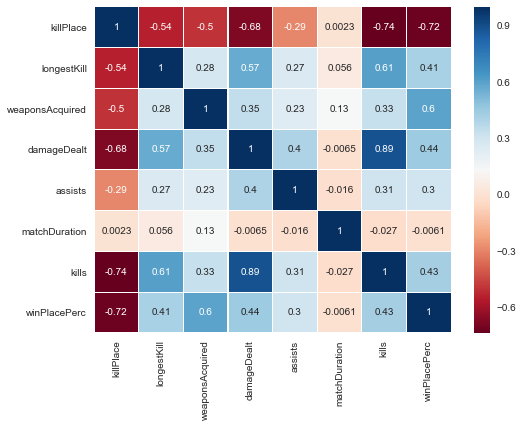

In [40]:
#Others
train_cleaned['weaponsAcquired']
train_cleaned['killPlace']
#train_cleaned['damageDealt']
train_cleaned['longestKill']

corr = train_cleaned[['killPlace', 'longestKill', 'weaponsAcquired', 'damageDealt', 'assists', 'matchDuration', 'kills', 'winPlacePerc']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu"
)
plt.show()

## Roadkills

In [41]:
file = train_cleaned.copy()

In [42]:
print("The average person kills " + str(file['roadKills'].mean()) + " people")  
print("25% of the people have killed " + str(file['roadKills'].quantile(0.25)) +" people or less in a vehicle")
print("50% of the people have killed " + str(file['roadKills'].quantile(0.50)) +" people or less in a vehicle")
print("75% of the people have killed " + str(file['roadKills'].quantile(0.75)) +" people or less in a vehicle")
print("99% of the people have killed " + str(file['roadKills'].quantile(0.99)) +" people or less in a vehicle")

The average person kills 0.0037954428429938197 people
25% of the people have killed 0.0 people or less in a vehicle
50% of the people have killed 0.0 people or less in a vehicle
75% of the people have killed 0.0 people or less in a vehicle
99% of the people have killed 0.0 people or less in a vehicle


So we can observe that it is difficult to kill people from a vehicle

In [43]:
print("Maximum recorded kills in a vehcile are "+ str(file['roadKills'].max()))

Maximum recorded kills in a vehcile are 10


In [44]:
corr_roadKills = file[['roadKills', 'winPlacePerc']].corr()
corr_roadKills

roadKills  winPlacePerc
roadKills      1.000000      0.037894
winPlacePerc   0.037894      1.000000

Hence there is very little correlation between roadkills and winPlacePerc

## Number of times a player killed his own team member¶

In [46]:
print("The average person kills " + str(file['teamKills'].mean()) + " people")  
print("25% of the people have killed " + str(file['teamKills'].quantile(0.25)) +" from their team")
print("50% of the people have killed " + str(file['teamKills'].quantile(0.50)) +" from their team")
print("75% of the people have killed " + str(file['teamKills'].quantile(0.75)) +" from their team")
print("99% of the people have killed " + str(file['teamKills'].quantile(0.99)) +" from their team")

The average person kills 0.029007714872097076 people
25% of the people have killed 0.0 from their team
50% of the people have killed 0.0 from their team
75% of the people have killed 0.0 from their team
99% of the people have killed 1.0 from their team


In [47]:
print("Maximum recorded kills in a vehcile are "+ str(file['teamKills'].max()))

Maximum recorded kills in a vehcile are 5


In [48]:
corr_teamKills = file[['teamKills', 'winPlacePerc']].corr()
corr_teamKills

teamKills  winPlacePerc
teamKills      1.000000      0.027934
winPlacePerc   0.027934      1.000000

## Damage to enemy players¶

In [49]:
null_kills = file[file['kills'] == 0]#players with 0 kills

In [50]:
len(null_kills)

1561477

In [51]:
corr_damageDealt = file[['damageDealt', 'winPlacePerc']].corr()
corr_damageDealt

damageDealt  winPlacePerc
damageDealt       1.00000       0.44487
winPlacePerc      0.44487       1.00000

## Number of players in the game

In [52]:
file['playersJoined'] = file.groupby('matchId')['matchId'].transform('count')

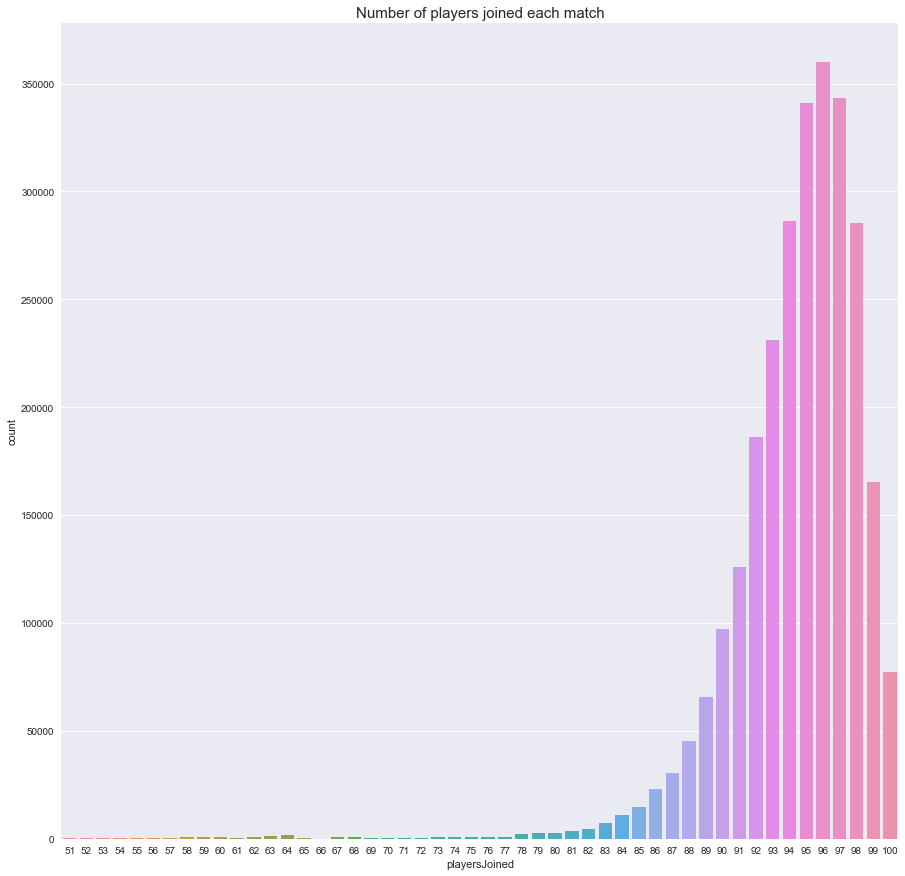

In [53]:
data = file[file['playersJoined'] > 50]

plt.figure(figsize=(15,15))
sns.countplot(data['playersJoined'].sort_values())
plt.title('Number of players joined each match',fontsize=15)
plt.savefig('num_of_players_join.jpg')
plt.show()

## Let's consider the match type¶

In [54]:
types_of_matches = file['matchType'].unique()

In [55]:
types_of_matches

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'flarefpp',
       'normal-duo-fpp', 'normal-solo-fpp', 'crashtpp', 'normal-squad',
       'normal-duo', 'normal-solo'], dtype=object)

If we observe carefully, there are only 4 types of games to consider - solo(one player against everyone), duo(team of two against everyone), squad(team of 4 against everyone) and other(custom and special modes)

In [56]:
new_data = file.copy()

In [57]:
new_data['matchType'][new_data['matchType'] == 'normal-solo'] = 'solo'
new_data['matchType'][new_data['matchType'] == 'solo-fpp'] = 'solo'
new_data['matchType'][new_data['matchType'] == 'normal-solo-fpp'] = 'solo'
new_data['matchType'][new_data['matchType'] == 'normal-duo-fpp'] = 'duo'
new_data['matchType'][new_data['matchType'] == 'normal-duo'] = 'duo'
new_data['matchType'][new_data['matchType'] == 'duo-fpp'] = 'duo'
new_data['matchType'][new_data['matchType'] == 'squad-fpp'] = 'squad'
new_data['matchType'][new_data['matchType'] == 'normal-squad'] = 'squad'
new_data['matchType'][new_data['matchType'] == 'normal-squad-fpp'] = 'squad'
new_data['matchType'][new_data['matchType'] == 'flaretpp'] = 'Other'
new_data['matchType'][new_data['matchType'] == 'flarefpp'] = 'Other'
new_data['matchType'][new_data['matchType'] == 'crashtpp'] = 'Other'
new_data['matchType'][new_data['matchType'] == 'crashfpp'] = 'Other'

/Users/wen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/wen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/wen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/

In [58]:
print(new_data['matchType'].unique())

['squad' 'duo' 'solo' 'Other']


In [59]:
print("There percentage of solo games is " + str((len(new_data[new_data['matchType'] == 'solo'])/len(new_data))*100))
print("There percentage of duo games is " + str((len(new_data[new_data['matchType'] == 'duo'])/len(new_data))*100))
print("There percentage of squad games is " + str((len(new_data[new_data['matchType'] == 'squad'])/len(new_data))*100))
print("There percentage of other games is " + str((len(new_data[new_data['matchType'] == 'Other'])/len(new_data))*100))

There percentage of solo games is 17.231522013422623
There percentage of duo games is 30.144013863139424
There percentage of squad games is 52.27449424484253
There percentage of other games is 0.3499698785954236


Let's look at the correlation between winPlacePerc and killStreaks for solo, duo, squad and other. Earlier we computed Pearson R Correlation for winPlacePerc and killStreaks for all matches which was 0.38. Let's see if the classification into solo, duo, squad and other changes anything.

In [60]:
solo = new_data[new_data['matchType'] == 'solo'].reset_index()
duo = new_data[new_data['matchType'] == 'duo'].reset_index()
squad = new_data[new_data['matchType'] == 'squad'].reset_index()
other = new_data[new_data['matchType'] == 'Other'].reset_index()

In [61]:
solo_corr = solo[['killStreaks', 'winPlacePerc']].corr()
duo_corr = duo[['killStreaks', 'winPlacePerc']].corr()
squad_corr = squad[['killStreaks', 'winPlacePerc']].corr()
other_corr = other[['killStreaks', 'winPlacePerc']].corr()

In [62]:
print("SOLO CORRELATION :", solo_corr, "DUO CORRELATION :", duo_corr, "SQUAD CORRELATION :", squad_corr, "OTHER CORRELATION :", other_corr, sep = "\n\n")

SOLO CORRELATION :

              killStreaks  winPlacePerc
killStreaks      1.000000      0.456721
winPlacePerc     0.456721      1.000000

DUO CORRELATION :

              killStreaks  winPlacePerc
killStreaks      1.000000      0.408245
winPlacePerc     0.408245      1.000000

SQUAD CORRELATION :

              killStreaks  winPlacePerc
killStreaks      1.000000      0.353021
winPlacePerc     0.353021      1.000000

OTHER CORRELATION :

              killStreaks  winPlacePerc
killStreaks      1.000000      0.396407
winPlacePerc     0.396407      1.000000


## Correlation for each feature for SOLO, DUO, SQUAD and OTHER

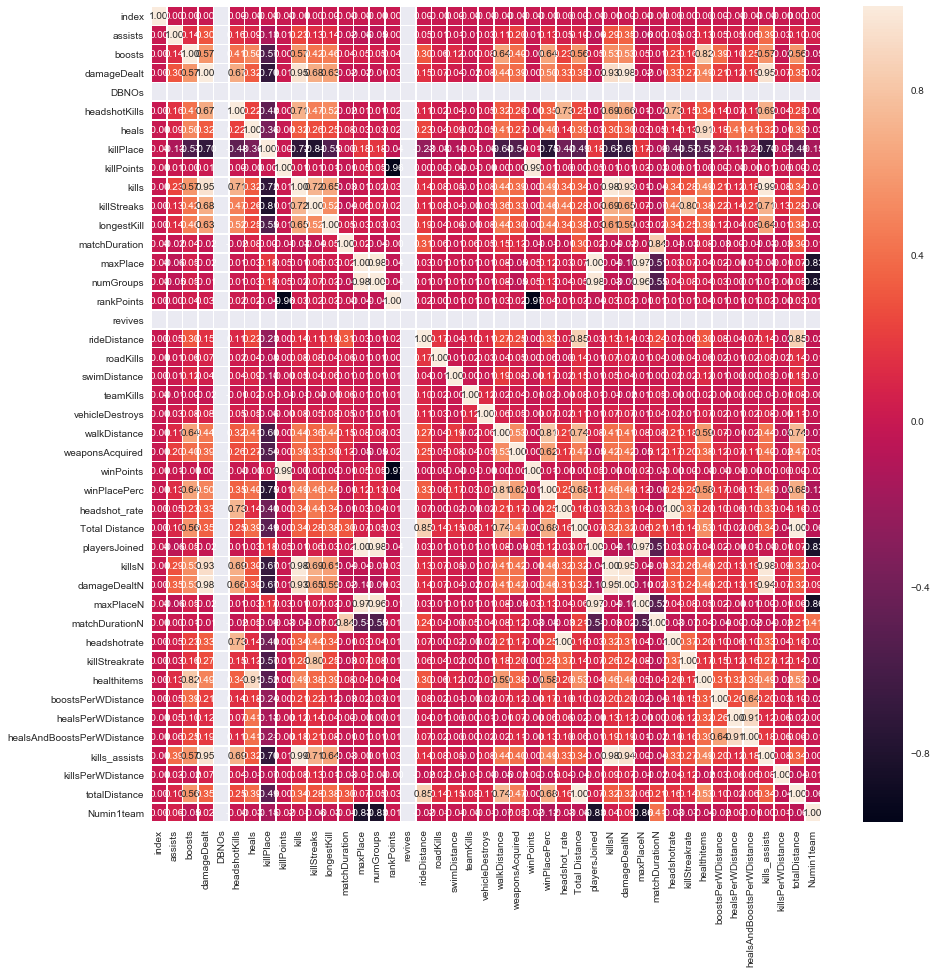

In [63]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(solo.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.savefig('heat_solo.jpg')
plt.show()

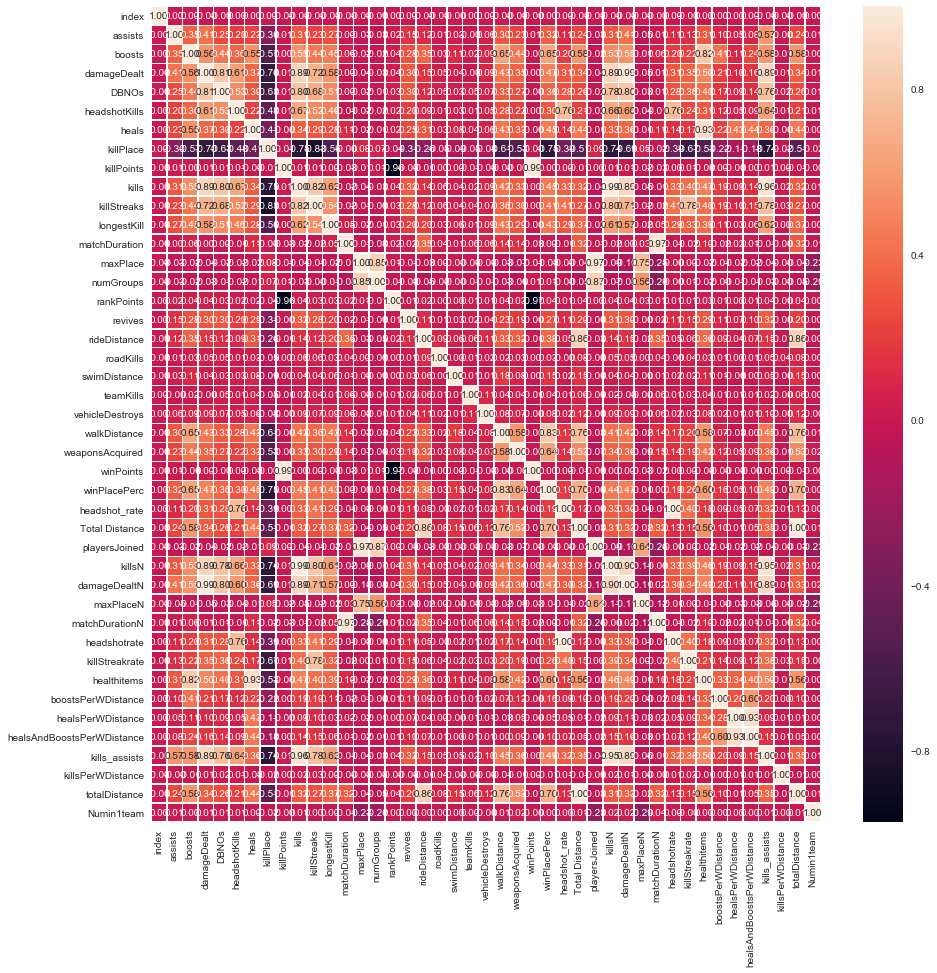

In [64]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(duo.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.savefig('heat_duo.jpg')
plt.show()

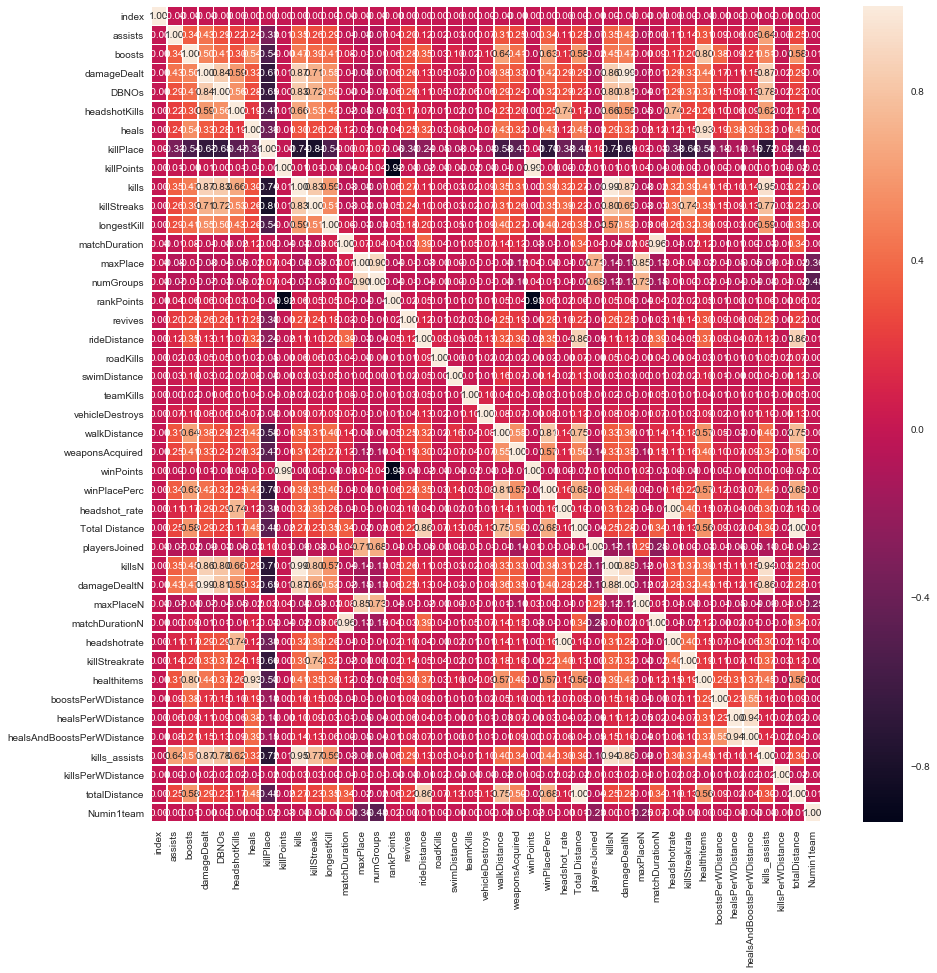

In [65]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(squad.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.savefig('heat_squad.jpg')
plt.show()

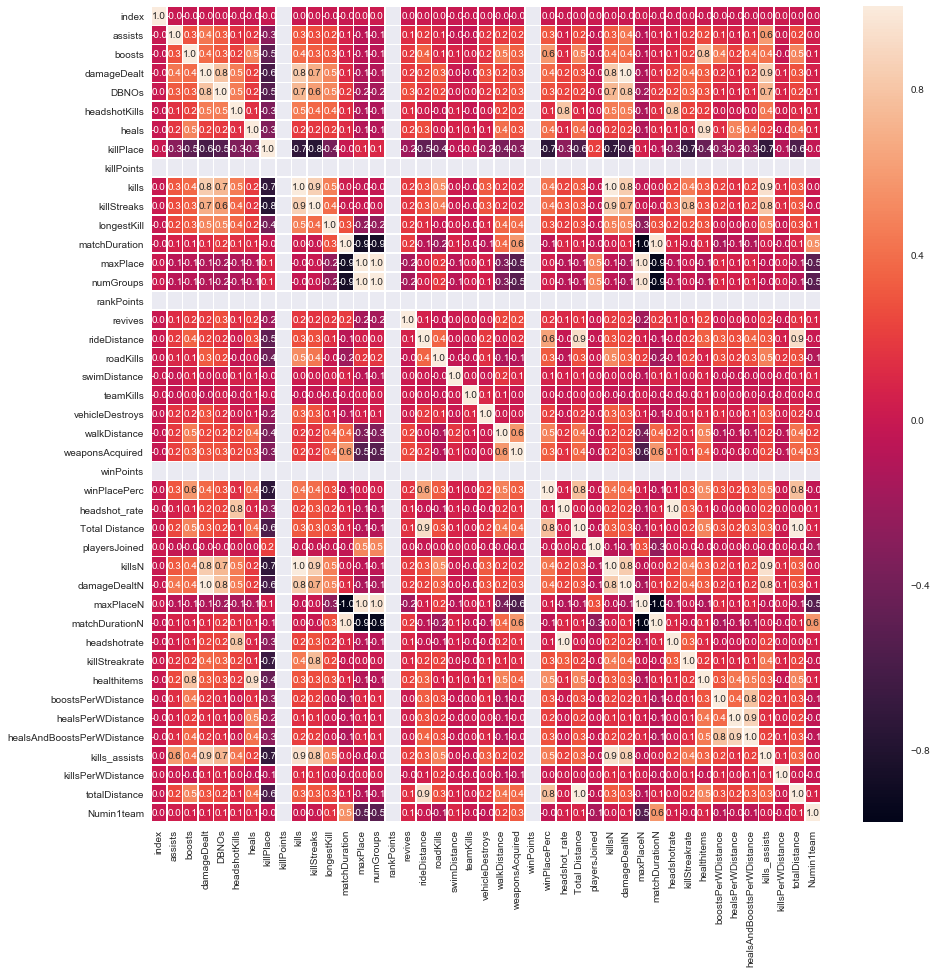

In [66]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(other.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.savefig('heat_other.jpg')
plt.show()